#### Analysis

In [1]:
import pandas as pd
import os
import datetime

## Reading and merging all files


In [2]:
all_files = [each_file for each_file in os.listdir("./Sales_Data")]

big_df = pd.DataFrame()

for file in all_files:
    df = pd.read_csv("./Sales_Data/"+file)
    big_df = pd.concat([big_df, df])

big_df.to_csv("all_months.csv", index=False)

### Some cleaning

In [3]:
#Removing NaN rows
big_df = pd.read_csv("./all_months.csv")
big_df = big_df.dropna(how="all")



In [4]:
big_df["month_number"] = big_df["Order Date"].str[0:2]

In [7]:
#Removing rows with month number as "Or"
big_df = big_df[big_df["month_number"] != "Or"]


#Converting to month_number to int32 datatype
big_df["month_number"] = big_df["Order Date"].str[0:2]
big_df["month_number"] = big_df["month_number"].astype("int32")
big_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_number
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


## Finding sales for each month

In [8]:
big_df["Quantity Ordered"] = big_df["Quantity Ordered"].astype("int32")
big_df["Price Each"] = big_df["Price Each"].astype("float32")

In [9]:
big_df["gross_amount"] = big_df["Price Each"] * big_df["Quantity Ordered"]
big_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_number,gross_amount
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.970000
186846,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.000000
186847,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.000000
186848,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.989990


In [10]:
sales_per_month = big_df.groupby("month_number").sum()
sales_per_month

,Quantity Ordered,Price Each,gross_amount
month_number,,,
1,10903,1811768.375,1.822257e+06
2,13449,2188884.750,2.202022e+06
3,17005,2791207.750,2.807100e+06
4,20558,3367671.000,3.390670e+06
5,18667,3135125.000,3.152607e+06
6,15253,2562025.500,2.577802e+06
7,16072,2632539.500,2.647776e+06
8,13448,2230345.500,2.244468e+06
9,13109,2084992.125,2.097560e+06


In [11]:
pd.options.display.float_format = "{:.2f}".format
big_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_number,gross_amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [12]:
import matplotlib.pyplot as plt

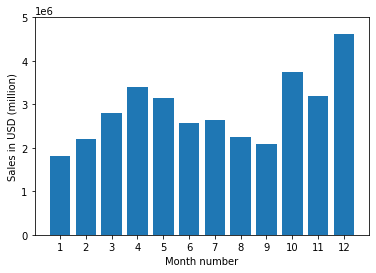

In [13]:
months = range(1,13)

plt.bar(months,sales_per_month["gross_amount"])
plt.xticks(months)
plt.yticks(range(0,6000000,1000000))
plt.xlabel("Month number")
plt.ylabel("Sales in USD (million)")
plt.show()

## Which city had the highest sales?

In [14]:
#Creating a city column

big_df["City"] = big_df["Purchase Address"].apply(lambda x: x.split(",")[1] + x.split(",")[2][0:3])
big_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_number,gross_amount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [15]:
city_sales = big_df.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,month_number,gross_amount
City,,,,
Atlanta GA,16602,2779908.25,104794,2795498.57
Austin TX,11153,1809873.62,69829,1819581.74
Boston MA,22528,3637409.75,141112,3661641.99
Dallas TX,16730,2752627.75,104620,2767975.39
Los Angeles CA,33289,5421435.00,208325,5452570.77
New York City NY,27932,4635371.00,175741,4664317.41
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.25,70621,1870732.33
San Francisco CA,50239,8211461.50,315520,8262203.87


In [16]:
import numpy as np
big_df['City'].unique()
cities = big_df['City'].unique()
cities = np.sort(cities)
cities

array([' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX',
       ' Los Angeles CA', ' New York City NY', ' Portland ME',
       ' Portland OR', ' San Francisco CA', ' Seattle WA'], dtype=object)

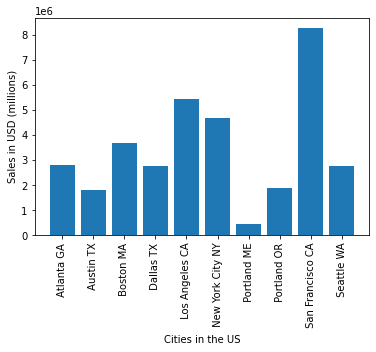

In [17]:
plt.bar(cities, city_sales["gross_amount"], width=0.8)
plt.xlabel("Cities in the US")
plt.ylabel("Sales in USD (millions)")
plt.xticks(rotation='vertical')
plt.show()

## In which hour were most purchases made?

In [18]:
big_df["Datetime"] = pd.to_datetime(big_df["Order Date"])

In [19]:
big_df["Hour"] = big_df["Datetime"].dt.hour
big_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_number,gross_amount,City,Datetime,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,2019-09-17 20:56:00,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,2019-09-01 16:00:00,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,2019-09-23 07:39:00,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,2019-09-19 17:30:00,17


In [20]:
hour_data = big_df.groupby("Hour").count()['Price Each']
hour_data

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Price Each, dtype: int64

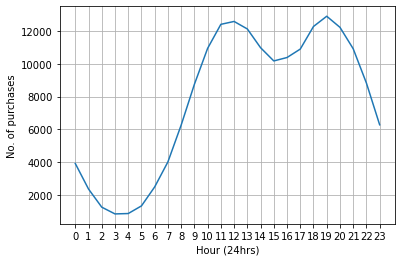

In [21]:
hours = [hour for hour, df in big_df.groupby("Hour")]

plt.plot(hours, hour_data)
plt.xticks(hours)
plt.grid()
plt.xlabel("Hour (24hrs)")
plt.ylabel("No. of purchases")
plt.show()

In [22]:
df = big_df[big_df['Order ID'].duplicated(keep=False)]
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID', 'grouped']].drop_duplicates()
df

C:\Users\rohit\AppData\Local\Temp/ipykernel_4976/2318964970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [26]:
from itertools import combinations
from collections import Counter

count = Counter()

for order in df['grouped']:
    sub_list = order.split(",")
    count.update(Counter(combinations(sub_list, 2)))

print(count.most_common(5))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]


In [27]:
counts = list(count.items())

countsFiltered = []

for eachGroup in counts:
    
    repetitions = eachGroup[1]
    
    if repetitions > 3:
        countsFiltered.append(eachGroup)

In [28]:
countsFilteredCol1 = [ x[0] for x in countsFiltered ]
countsFilteredCol2 = [ int(x[1]) for x in countsFiltered ]
dfFiltered = pd.DataFrame(data={"items": countsFilteredCol1, "frequency": countsFilteredCol2})
dfFiltered

,items,frequency
0,"(Google Phone, Wired Headphones)",414
1,"(Google Phone, USB-C Charging Cable)",987
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27
3,"(AAA Batteries (4-pack), Google Phone)",11
4,"(Lightning Charging Cable, USB-C Charging Cable)",58
...,...,...
213,"(Bose SoundSport Headphones, Google Phone)",8
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4
215,"(34in Ultrawide Monitor, 27in FHD Monitor)",5
216,"(AAA Batteries (4-pack), Vareebadd Phone)",4


In [76]:
total = len(big_df['Order ID'].unique())
dfFiltered['item1'] = dfFiltered['items'].apply(lambda x: x[0])
dfFiltered['item2'] = dfFiltered['items'].apply(lambda x: x[1])
dfFiltered

,items,frequency,item1,item2,support1,support2,supportOfGroup,supportProduct,lift
0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones,0.041284,0.077982,1.899083,0.003219,589.882353
1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable,0.041284,0.077982,4.527523,0.003219,1406.313725
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27,Bose SoundSport Headphones,Bose SoundSport Headphones,0.073394,0.073394,0.123853,0.005387,22.992188
3,"(AAA Batteries (4-pack), Google Phone)",11,AAA Batteries (4-pack),Google Phone,0.077982,0.041284,0.050459,0.003219,15.673203
4,"(Lightning Charging Cable, USB-C Charging Cable)",58,Lightning Charging Cable,USB-C Charging Cable,0.077982,0.077982,0.266055,0.006081,43.750865
...,...,...,...,...,...,...,...,...,...
213,"(Bose SoundSport Headphones, Google Phone)",8,Bose SoundSport Headphones,Google Phone,0.073394,0.041284,0.036697,0.003030,12.111111
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4,Bose SoundSport Headphones,Macbook Pro Laptop,0.073394,0.045872,0.018349,0.003367,5.450000
215,"(34in Ultrawide Monitor, 27in FHD Monitor)",5,34in Ultrawide Monitor,27in FHD Monitor,0.045872,0.055046,0.022936,0.002525,9.083333
216,"(AAA Batteries (4-pack), Vareebadd Phone)",4,AAA Batteries (4-pack),Vareebadd Phone,0.077982,0.032110,0.018349,0.002504,7.327731


In [77]:
total

178437

In [78]:
valueCounts = dfFiltered[['item1']].value_counts()
valueCounts2 = dfFiltered[['item2']].value_counts()
valueCounts.append(valueCounts2)

item1                     
AAA Batteries (4-pack)        17
Apple Airpods Headphones      17
Wired Headphones              17
USB-C Charging Cable          17
Lightning Charging Cable      17
AA Batteries (4-pack)         16
Bose SoundSport Headphones    16
27in 4K Gaming Monitor        13
iPhone                        12
27in FHD Monitor              12
Flatscreen TV                 11
Macbook Pro Laptop            10
34in Ultrawide Monitor        10
Google Phone                   9
ThinkPad Laptop                8
Vareebadd Phone                7
20in Monitor                   7
LG Washing Machine             1
LG Dryer                       1
AA Batteries (4-pack)         18
Apple Airpods Headphones      17
Wired Headphones              17
USB-C Charging Cable          17
AAA Batteries (4-pack)        16
Bose SoundSport Headphones    16
Lightning Charging Cable      16
34in Ultrawide Monitor        14
27in FHD Monitor              12
27in 4K Gaming Monitor        11
Macbook Pro Lapt

In [79]:
valueCounts = big_df[['Product']].value_counts()


In [80]:
pd.reset_option('display.float_format')
dfFiltered['support1'] = dfFiltered['item1'].apply(lambda x: valueCounts[x] / total)
dfFiltered

,items,frequency,item1,item2,support1,support2,supportOfGroup,supportProduct,lift
0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones,0.030963,0.077982,1.899083,0.003219,589.882353
1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable,0.030963,0.077982,4.527523,0.003219,1406.313725
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27,Bose SoundSport Headphones,Bose SoundSport Headphones,0.074676,0.073394,0.123853,0.005387,22.992188
3,"(AAA Batteries (4-pack), Google Phone)",11,AAA Batteries (4-pack),Google Phone,0.115677,0.041284,0.050459,0.003219,15.673203
4,"(Lightning Charging Cable, USB-C Charging Cable)",58,Lightning Charging Cable,USB-C Charging Cable,0.121376,0.077982,0.266055,0.006081,43.750865
...,...,...,...,...,...,...,...,...,...
213,"(Bose SoundSport Headphones, Google Phone)",8,Bose SoundSport Headphones,Google Phone,0.074676,0.041284,0.036697,0.003030,12.111111
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4,Bose SoundSport Headphones,Macbook Pro Laptop,0.074676,0.045872,0.018349,0.003367,5.450000
215,"(34in Ultrawide Monitor, 27in FHD Monitor)",5,34in Ultrawide Monitor,27in FHD Monitor,0.034640,0.055046,0.022936,0.002525,9.083333
216,"(AAA Batteries (4-pack), Vareebadd Phone)",4,AAA Batteries (4-pack),Vareebadd Phone,0.115677,0.032110,0.018349,0.002504,7.327731


In [81]:
dfFiltered['support1'] = dfFiltered['item1'].apply(lambda x: valueCounts[x]/total)
dfFiltered

,items,frequency,item1,item2,support1,support2,supportOfGroup,supportProduct,lift
0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones,0.030963,0.077982,1.899083,0.003219,589.882353
1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable,0.030963,0.077982,4.527523,0.003219,1406.313725
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27,Bose SoundSport Headphones,Bose SoundSport Headphones,0.074676,0.073394,0.123853,0.005387,22.992188
3,"(AAA Batteries (4-pack), Google Phone)",11,AAA Batteries (4-pack),Google Phone,0.115677,0.041284,0.050459,0.003219,15.673203
4,"(Lightning Charging Cable, USB-C Charging Cable)",58,Lightning Charging Cable,USB-C Charging Cable,0.121376,0.077982,0.266055,0.006081,43.750865
...,...,...,...,...,...,...,...,...,...
213,"(Bose SoundSport Headphones, Google Phone)",8,Bose SoundSport Headphones,Google Phone,0.074676,0.041284,0.036697,0.003030,12.111111
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4,Bose SoundSport Headphones,Macbook Pro Laptop,0.074676,0.045872,0.018349,0.003367,5.450000
215,"(34in Ultrawide Monitor, 27in FHD Monitor)",5,34in Ultrawide Monitor,27in FHD Monitor,0.034640,0.055046,0.022936,0.002525,9.083333
216,"(AAA Batteries (4-pack), Vareebadd Phone)",4,AAA Batteries (4-pack),Vareebadd Phone,0.115677,0.032110,0.018349,0.002504,7.327731


In [82]:
dfFiltered['support2'] = dfFiltered['item2'].apply(lambda x: valueCounts[x]/total)
dfFiltered

,items,frequency,item1,item2,support1,support2,supportOfGroup,supportProduct,lift
0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones,0.030963,0.105819,1.899083,0.003219,589.882353
1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable,0.030963,0.122749,4.527523,0.003219,1406.313725
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27,Bose SoundSport Headphones,Bose SoundSport Headphones,0.074676,0.074676,0.123853,0.005387,22.992188
3,"(AAA Batteries (4-pack), Google Phone)",11,AAA Batteries (4-pack),Google Phone,0.115677,0.030963,0.050459,0.003219,15.673203
4,"(Lightning Charging Cable, USB-C Charging Cable)",58,Lightning Charging Cable,USB-C Charging Cable,0.121376,0.122749,0.266055,0.006081,43.750865
...,...,...,...,...,...,...,...,...,...
213,"(Bose SoundSport Headphones, Google Phone)",8,Bose SoundSport Headphones,Google Phone,0.074676,0.030963,0.036697,0.003030,12.111111
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4,Bose SoundSport Headphones,Macbook Pro Laptop,0.074676,0.026474,0.018349,0.003367,5.450000
215,"(34in Ultrawide Monitor, 27in FHD Monitor)",5,34in Ultrawide Monitor,27in FHD Monitor,0.034640,0.042071,0.022936,0.002525,9.083333
216,"(AAA Batteries (4-pack), Vareebadd Phone)",4,AAA Batteries (4-pack),Vareebadd Phone,0.115677,0.011573,0.018349,0.002504,7.327731


In [83]:
dfFiltered['supportOfGroup'] = dfFiltered['frequency'].apply(lambda x: x / total)
dfFiltered

,items,frequency,item1,item2,support1,support2,supportOfGroup,supportProduct,lift
0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones,0.030963,0.105819,0.002320,0.003219,589.882353
1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable,0.030963,0.122749,0.005531,0.003219,1406.313725
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27,Bose SoundSport Headphones,Bose SoundSport Headphones,0.074676,0.074676,0.000151,0.005387,22.992188
3,"(AAA Batteries (4-pack), Google Phone)",11,AAA Batteries (4-pack),Google Phone,0.115677,0.030963,0.000062,0.003219,15.673203
4,"(Lightning Charging Cable, USB-C Charging Cable)",58,Lightning Charging Cable,USB-C Charging Cable,0.121376,0.122749,0.000325,0.006081,43.750865
...,...,...,...,...,...,...,...,...,...
213,"(Bose SoundSport Headphones, Google Phone)",8,Bose SoundSport Headphones,Google Phone,0.074676,0.030963,0.000045,0.003030,12.111111
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4,Bose SoundSport Headphones,Macbook Pro Laptop,0.074676,0.026474,0.000022,0.003367,5.450000
215,"(34in Ultrawide Monitor, 27in FHD Monitor)",5,34in Ultrawide Monitor,27in FHD Monitor,0.034640,0.042071,0.000028,0.002525,9.083333
216,"(AAA Batteries (4-pack), Vareebadd Phone)",4,AAA Batteries (4-pack),Vareebadd Phone,0.115677,0.011573,0.000022,0.002504,7.327731


In [84]:
dfFiltered['supportProduct'] = dfFiltered['support1'] * dfFiltered['support2']
dfFiltered

,items,frequency,item1,item2,support1,support2,supportOfGroup,supportProduct,lift
0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones,0.030963,0.105819,0.002320,0.003277,589.882353
1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable,0.030963,0.122749,0.005531,0.003801,1406.313725
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27,Bose SoundSport Headphones,Bose SoundSport Headphones,0.074676,0.074676,0.000151,0.005577,22.992188
3,"(AAA Batteries (4-pack), Google Phone)",11,AAA Batteries (4-pack),Google Phone,0.115677,0.030963,0.000062,0.003582,15.673203
4,"(Lightning Charging Cable, USB-C Charging Cable)",58,Lightning Charging Cable,USB-C Charging Cable,0.121376,0.122749,0.000325,0.014899,43.750865
...,...,...,...,...,...,...,...,...,...
213,"(Bose SoundSport Headphones, Google Phone)",8,Bose SoundSport Headphones,Google Phone,0.074676,0.030963,0.000045,0.002312,12.111111
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4,Bose SoundSport Headphones,Macbook Pro Laptop,0.074676,0.026474,0.000022,0.001977,5.450000
215,"(34in Ultrawide Monitor, 27in FHD Monitor)",5,34in Ultrawide Monitor,27in FHD Monitor,0.034640,0.042071,0.000028,0.001457,9.083333
216,"(AAA Batteries (4-pack), Vareebadd Phone)",4,AAA Batteries (4-pack),Vareebadd Phone,0.115677,0.011573,0.000022,0.001339,7.327731


In [85]:
dfFiltered['lift'] = dfFiltered['supportOfGroup'] / dfFiltered['supportProduct']
dfFiltered

,items,frequency,item1,item2,support1,support2,supportOfGroup,supportProduct,lift
0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones,0.030963,0.105819,0.002320,0.003277,0.708117
1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable,0.030963,0.122749,0.005531,0.003801,1.455346
2,"(Bose SoundSport Headphones, Bose SoundSport H...",27,Bose SoundSport Headphones,Bose SoundSport Headphones,0.074676,0.074676,0.000151,0.005577,0.027134
3,"(AAA Batteries (4-pack), Google Phone)",11,AAA Batteries (4-pack),Google Phone,0.115677,0.030963,0.000062,0.003582,0.017211
4,"(Lightning Charging Cable, USB-C Charging Cable)",58,Lightning Charging Cable,USB-C Charging Cable,0.121376,0.122749,0.000325,0.014899,0.021817
...,...,...,...,...,...,...,...,...,...
213,"(Bose SoundSport Headphones, Google Phone)",8,Bose SoundSport Headphones,Google Phone,0.074676,0.030963,0.000045,0.002312,0.019390
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4,Bose SoundSport Headphones,Macbook Pro Laptop,0.074676,0.026474,0.000022,0.001977,0.011339
215,"(34in Ultrawide Monitor, 27in FHD Monitor)",5,34in Ultrawide Monitor,27in FHD Monitor,0.034640,0.042071,0.000028,0.001457,0.019228
216,"(AAA Batteries (4-pack), Vareebadd Phone)",4,AAA Batteries (4-pack),Vareebadd Phone,0.115677,0.011573,0.000022,0.001339,0.016745


In [87]:
dfFiltered.sort_values('lift', ascending=False)

,items,frequency,item1,item2,support1,support2,supportOfGroup,supportProduct,lift
1,"(Google Phone, USB-C Charging Cable)",987,Google Phone,USB-C Charging Cable,0.030963,0.122749,0.005531,0.003801,1.455346
20,"(Vareebadd Phone, USB-C Charging Cable)",361,Vareebadd Phone,USB-C Charging Cable,0.011573,0.122749,0.002023,0.001421,1.424192
7,"(iPhone, Lightning Charging Cable)",1005,iPhone,Lightning Charging Cable,0.038344,0.121376,0.005632,0.004654,1.210179
0,"(Google Phone, Wired Headphones)",414,Google Phone,Wired Headphones,0.030963,0.105819,0.002320,0.003277,0.708117
43,"(Vareebadd Phone, Wired Headphones)",143,Vareebadd Phone,Wired Headphones,0.011573,0.105819,0.000801,0.001225,0.654414
...,...,...,...,...,...,...,...,...,...
214,"(Bose SoundSport Headphones, Macbook Pro Laptop)",4,Bose SoundSport Headphones,Macbook Pro Laptop,0.074676,0.026474,0.000022,0.001977,0.011339
84,"(Apple Airpods Headphones, 34in Ultrawide Moni...",6,Apple Airpods Headphones,34in Ultrawide Monitor,0.087140,0.034640,0.000034,0.003019,0.011140
102,"(iPhone, Bose SoundSport Headphones)",5,iPhone,Bose SoundSport Headphones,0.038344,0.074676,0.000028,0.002863,0.009786
210,"(ThinkPad Laptop, Wired Headphones)",4,ThinkPad Laptop,Wired Headphones,0.023134,0.105819,0.000022,0.002448,0.009157
